In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import warnings 
import keras
import tensorflow as tf
import random
import os
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Using TensorFlow backend.
C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\tenso

In [2]:
col=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
path = '../Datamining/adult.data'
df = pd.read_csv(path, header=None, sep=',\s')
df.columns=col

path2 = '../Datamining/adult.test'
df2 = pd.read_csv(path2, header=None, sep=',\s')
df2.columns=col

C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
#workclass, occupation, native_country have " ?" value
#iloc[:,[1,6,13]]
df=df.replace(to_replace=r'^ ?.$', value=np.nan, regex=True)
df2=df2.replace(to_replace=r'^ ?.$', value=np.nan, regex=True)

# Fill NaN Value

In [6]:
df.loc[((df.workclass.isnull().astype(int) + df.occupation.isnull().astype(int)) == 1),['workclass','occupation']]

,workclass,occupation
5361,Never-worked,NaN
10845,Never-worked,NaN
14772,Never-worked,NaN
20337,Never-worked,NaN
23232,Never-worked,NaN
32304,Never-worked,NaN
32314,Never-worked,NaN


In [7]:
df[df['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [8]:
df2[df2['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8785,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
13898,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


In [9]:
#沒工作所以沒有工作類型
df.loc[df.workclass == 'Never-worked',['occupation']] = 'None'
df2.loc[df2.workclass == 'Never-worked',['occupation']] = 'None'

In [10]:
#研究生沒工作所以沒有工作和工作類型
index=df[(df['occupation'].isnull()) & (df['age']<=24) & (df['education_num']<=11)].index
index2=df2[(df2['occupation'].isnull()) & (df2['age']<=24) & (df2['education_num']<=11)].index
df['workclass'].iloc[index]='Never-worked'
df['occupation'].iloc[index]='Student'
df2['workclass'].iloc[index2]='Never-worked'
df2['occupation'].iloc[index2]='Student'

C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
index=df[(df['occupation'].isnull()) & (df['age']>=60) & (df['hours_per_week']<50)].index
index2=df2[(df2['occupation'].isnull()) & (df2['age']>=60) & (df2['hours_per_week']<50)].index

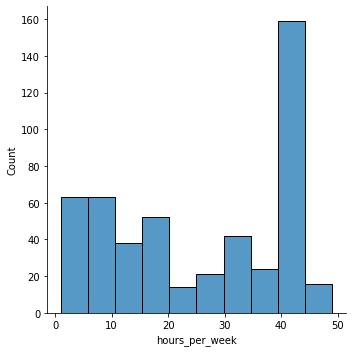

In [12]:
sb.displot(df.iloc[index]['hours_per_week'])

In [13]:
index=df[(df['occupation'].isnull()) & (df['age']>=60) & (df['hours_per_week']<40)].index
index2=df2[(df2['occupation'].isnull()) & (df2['age']>=60) & (df2['hours_per_week']<40)].index

In [14]:
#找出年紀大且一週工時最多者，把小於正常工時的人設為退休
df['workclass'].iloc[index]='Retired'
df['occupation'].iloc[index]='Retired'
df2['workclass'].iloc[index2]='Retired'
df2['occupation'].iloc[index2]='Retired'

C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
df=df.dropna()
df2=df2.dropna()

In [16]:
labelencoder = LabelEncoder()
df['workclass'] = labelencoder.fit_transform(df['workclass'])
df['marital_status'] = labelencoder.fit_transform(df['marital_status'])
df['occupation'] = labelencoder.fit_transform(df['occupation'])
df['relationship'] = labelencoder.fit_transform(df['relationship'])
df['race'] = labelencoder.fit_transform(df['race'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['native_country'] = labelencoder.fit_transform(df['native_country'])
df['income'] = labelencoder.fit_transform(df['income'])
df.reset_index(drop=True,inplace=True)
y_train=df['hours_per_week']
df.drop(columns=['fnlwgt','education','hours_per_week'],inplace=True)
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income
0,39,7,13,4,0,1,4,1,2174,0,38,0
1,50,6,13,2,3,0,4,1,0,0,38,0
2,38,3,9,0,5,1,4,1,0,0,38,0
3,53,3,7,2,5,0,2,1,0,0,38,0
4,28,3,13,2,10,5,2,0,0,0,4,0


In [17]:
df2['workclass'] = labelencoder.fit_transform(df2['workclass'])
df2['marital_status'] = labelencoder.fit_transform(df2['marital_status'])
df2['occupation'] = labelencoder.fit_transform(df2['occupation'])
df2['relationship'] = labelencoder.fit_transform(df2['relationship'])
df2['race'] = labelencoder.fit_transform(df2['race'])
df2['sex'] = labelencoder.fit_transform(df2['sex'])
df2['native_country'] = labelencoder.fit_transform(df2['native_country'])
df2['income'] = labelencoder.fit_transform(df2['income'])
df2.reset_index(drop=True,inplace=True)
y_test=df2['hours_per_week']
df2.drop(columns=['fnlwgt','education','hours_per_week'],inplace=True)
df2.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income
0,25,3,7,4,6,3,2,1,0,0,37,0
1,38,3,9,2,4,0,4,1,0,0,37,0
2,28,1,12,2,11,0,4,1,0,0,37,1
3,44,3,10,2,6,0,2,1,7688,0,37,1
4,18,2,10,4,14,3,4,0,0,0,37,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df)

X_train_scaled = scaler.transform(df)
X_test_scaled = scaler.transform(df2)

# Model

In [21]:
def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_torch(seed=42)

In [22]:
# num_layers: 9
# units_0: 144
# learning_rate: 0.001
# units_1: 80
# units_2: 176
# units_3: 48
# units_4: 144
# units_5: 80
# units_6: 464
# units_7: 400
# units_8: 496

In [23]:
model = Sequential()
model.add(Dense(144, input_dim=12, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(176, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(144, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(464, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(496, activation='relu'))

#Output layer
model.add(Dense(1, activation='linear'))

In [24]:
# model = Sequential()
# model.add(Dense(50, input_dim=9, init='normal', activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(48, activation='relu', init='normal'))
# model.add(Dropout(0.3))
# #Output layer
# model.add(Dense(1, activation='linear'))

In [25]:
#optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'],learning_rate=0.001)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 144)               1872      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                11600     
_________________________________________________________________
dense_3 (Dense)              (None, 176)               14256     
_________________________________________________________________
dense_4 (Dense)              (None, 48)                8496      
_________________________________________________________________
dense_5 (Dense)              (None, 144)               7056      
_________________________________________________________________
dense_6 (Dense)              (None, 80)                11600     
_________________________________________________________________
dense_7 (Dense)              (None, 464)               37584     
__________

In [26]:
# keras .__version__
# '2.0.2'

In [27]:
checkpoint_filepath = './checkpoint/'
modWeightsFilepath=checkpoint_filepath+"weights.h5"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=modWeightsFilepath, save_weights_only=True)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=35)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=32, epochs=20000, callbacks=[callback,model_checkpoint_callback])

C:\Users\USER\anaconda3\envs\ecg\lib\site-packages\keras\backend\tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 24864 samples, validate on 6216 samples
Epoch 1/20000
24864/24864 [==============================] - 3s - loss: 8.4441 - mean_absolute_error: 8.4441 - val_loss: 8.1307 - val_mean_absolute_error: 8.1307
Epoch 2/20000
24864/24864 [==============================] - 2s - loss: 7.5358 - mean_absolute_error: 7.5358 - val_loss: 7.3741 - val_mean_absolute_error: 7.3741
Epoch 3/20000
24864/24864 [==============================] - 2s - loss: 7.3311 - mean_absolute_error: 7.3311 - val_loss: 7.2741 - val_mean_absolute_error: 7.2741
Epoch 4/20000
24864/24864 [==============================] - 2s - loss: 7.2473 - mean_absolute_error: 7.2473 - val_loss: 7.1627 - val_mean_absolute_error: 7.1627
Epoch 5/20000
24864/24864 [==============================] - 2s - loss: 7.1456 - mean_absolute_error: 7.1456 - val_loss: 7.0840 - val_mean_absolute_error: 7.0840
Epoch 6/20000
24864/24864 [==============================] - 2s - loss: 7.0508 - mean_absolute_error: 7.0508 - val_loss: 7.0408 - val_mean_ab

24864/24864 [==============================] - 2s - loss: 6.5739 - mean_absolute_error: 6.5739 - val_loss: 6.8318 - val_mean_absolute_error: 6.8318
Epoch 52/20000
24864/24864 [==============================] - 3s - loss: 6.5405 - mean_absolute_error: 6.5405 - val_loss: 6.8785 - val_mean_absolute_error: 6.8785
Epoch 53/20000
24864/24864 [==============================] - 3s - loss: 6.5304 - mean_absolute_error: 6.5304 - val_loss: 6.7936 - val_mean_absolute_error: 6.7936
Epoch 54/20000
24864/24864 [==============================] - 3s - loss: 6.5917 - mean_absolute_error: 6.5917 - val_loss: 6.7810 - val_mean_absolute_error: 6.7810
Epoch 55/20000
24864/24864 [==============================] - 3s - loss: 6.5084 - mean_absolute_error: 6.5084 - val_loss: 7.0686 - val_mean_absolute_error: 7.0686
Epoch 56/20000
24864/24864 [==============================] - 3s - loss: 6.5073 - mean_absolute_error: 6.5073 - val_loss: 6.8989 - val_mean_absolute_error: 6.8989
Epoch 57/20000
24864/24864 [=========

24864/24864 [==============================] - 2s - loss: 6.3405 - mean_absolute_error: 6.3405 - val_loss: 6.8527 - val_mean_absolute_error: 6.8527
Epoch 102/20000
24864/24864 [==============================] - 2s - loss: 6.3029 - mean_absolute_error: 6.3029 - val_loss: 6.8801 - val_mean_absolute_error: 6.8801
Epoch 103/20000
24864/24864 [==============================] - 2s - loss: 6.2772 - mean_absolute_error: 6.2772 - val_loss: 6.7878 - val_mean_absolute_error: 6.7878
Epoch 104/20000
24864/24864 [==============================] - 2s - loss: 6.2755 - mean_absolute_error: 6.2755 - val_loss: 6.7916 - val_mean_absolute_error: 6.7916
Epoch 105/20000
24864/24864 [==============================] - 2s - loss: 6.2897 - mean_absolute_error: 6.2897 - val_loss: 6.8388 - val_mean_absolute_error: 6.8388
Epoch 106/20000
24864/24864 [==============================] - 2s - loss: 6.2613 - mean_absolute_error: 6.2613 - val_loss: 6.8437 - val_mean_absolute_error: 6.8437
Epoch 107/20000
24864/24864 [===

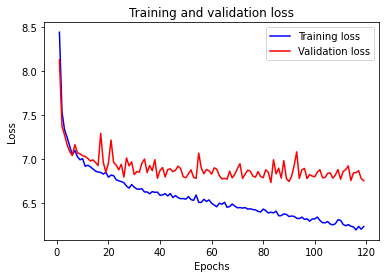

In [28]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[39.805107]
 [41.316833]
 [40.194313]
 [39.925293]
 [29.041779]]
Real values are:  0    40
1    50
2    40
3    40
4    30
Name: hours_per_week, dtype: int64


In [30]:
#Comparison with other models..
#Neural network - from the current code
mae_neural = model.evaluate(X_test_scaled, y_test)

14368/15573 [==========================>...] - ETA: 0s

In [31]:
print('Mean absolute error from neural net: ', mae_neural)

Mean absolute error from neural net:  [6.716960159071009, 6.716960159071009]


In [32]:
y_pred=model.predict(X_test_scaled)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",sqrt(mean_squared_error(y_test,y_pred)))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred)*100)

MAE: 6.716960144128703
RMSE: 10.968973960657136
MAPE: 27.27076486470127


# Best Model

In [ ]:
import glob
import h5py

model_files = sorted(glob.glob('./checkpoint/weights2.h5'))
for model_file in model_files:
    print("Update '{}'".format(model_file))
    with h5py.File(model_file, 'a') as f:
        if 'optimizer_weights' in f.keys():
            del f['optimizer_weights']

In [ ]:
model = keras.models.load_model('./checkpoint/weights2.h5')

# 驗證模型
mae_neural = model.evaluate(X_test_scaled, y_test)

In [ ]:
print('Mean absolute error from neural net: ', mae_neural)

In [ ]:
y_pred=model.predict(X_test_scaled)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",sqrt(mean_squared_error(y_test,y_pred)))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred)*100)

In [ ]:
# 40
# Mean absolute error from neural net:  6.984820928722419

# 50
# Mean absolute error from neural net:  6.984820928722419

# 65
# Mean absolute error from neural net:  6.973695607663946

# 100
# Mean absolute error from neural net:  6.950982490455776

# 94 with early stop: (,9)shape
# Mean absolute error from neural net:  6.926425130413361

# 82 with early stop: (,12)shape
# Mean absolute error from neural net:  6.8081617195513

# 137 with early stop: (,12)shape and MaxAbsScaler
# Mean absolute error from neural net:  6.782915303084476

# 124 with early stop: (,12)shape and MinMaxScaler
# Mean absolute error from neural net:  6.768512151653594

# 119 with early stop: (,12)shape and MinMaxScaler + checkpoint
# Mean absolute error from neural net:  6.716960159071009

# Tuner Search

In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project9',
    project_name='Air Quality Index')

In [ ]:
tuner.search_space_summary()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)

In [ ]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

In [ ]:
tuner.results_summary()

In [ ]:
#Model tensorflow=1.4.0
#Tuner tensorflow=2.2.0

In [ ]:
# num_layers: 9
# units_0: 144
# learning_rate: 0.001
# units_1: 80
# units_2: 176
# units_3: 48
# units_4: 144
# units_5: 80
# units_6: 464
# units_7: 400
# units_8: 496